## 8x dicodon FACS-Seq expression profiles

### Purpose

- Sorted my 8x dicodon library on the Aria2-3. I saved data from 50,000 cells from my negative, positive, and sort_replicate#1. I didn't save sort_replicate#2 (accidentally; FACS is tricky), but the expression data looked the same as rep#1. As such, I also did not include replicate#2 in my final analyses and plots of barcode enrichment analysis (though, again, replicates agreed closely in this analysis). 

- Here I'm just plotting the mKate/eYFP ratios of cells from the sort. Mostly just for reference in terms of what my expression levels were. FACS gate information is saved in pdfs, and this is prehaps more informative. "Pos_end_run" is the no-insert control data taken after running the 8x library; it's these data that are shown in the gateing strategy images. 

### Load libraries

In [1]:
# pipe operators
library(magrittr)
# tab data processing
library(tidyverse)
# Rasterizing stuff
library(ggrastr)
# supress warnings
options(warn = -1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()



### Read in all .FCS files

In [2]:
# look for files ending in .fcs
fcsfiles <- '../data/facs_data/' %>% 
  list.files(full.names = T, pattern = '.fcs$')  %>%  print 

# extract samplenames
samplenames <- fcsfiles %>% 
  # extract file name without .fcs extension and parent folders
  stringr::str_match('([^/]+).fcs$') %>% 
  magrittr::extract(,2)

flowdata  <- fcsfiles %>% 
  lapply(. %>%
         # read FCS file without any transformations
         flowCore::read.FCS(transformation = F, alter.names = T) %>% 
         # extract counts alone
         flowCore::exprs() %>% 
         # convert to dplyr tibble
         as_tibble()) %>% 
  # give samplenames based on above
  set_names(samplenames) %>% 
  # join all samples and assign'file' for joning with annotations
  bind_rows(.id = 'file') %>% 
  # add counts to get everything positive
  mutate_at(vars(matches('^FITC.*')), funs(. - 2 * min(.)))
  # %>% 
  #filter_if(is.numeric,all_vars(. >= 0))

print(flowdata)

[1] "../data/facs_data//Specimen_001_8xlibrary.fcs"  
[2] "../data/facs_data//Specimen_001_neg.fcs"        
[3] "../data/facs_data//Specimen_001_pos_end_run.fcs"
[4] "../data/facs_data//Specimen_001_pos.fcs"        
# A tibble: 400,000 × 12
   file    FSC.A  FSC.W FSC.H  SSC.A  SSC.W SSC.H FITC.A PE.Te…¹ Ratio…² Ratio…³
   <chr>   <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl>   <dbl>   <dbl>   <dbl>
 1 Speci… 1.09e5 9.33e4 76656 4.68e4 8.57e4 35764 14110. 14239.  253037. 200988.
 2 Speci… 9.93e4 9.01e4 72201 5.92e4 9.46e4 41005   516.   454.   86769. 262143 
 3 Speci… 1.14e5 9.95e4 75088 8.08e4 1.07e5 49716 22650. 32032.  182369.  93263.
 4 Speci… 1.11e5 9.64e4 75389 4.20e4 8.95e4 30781 11709. 12267.  242405. 236866.
 5 Speci… 1.64e5 1.45e5 74113 9.93e4 1.49e5 43745   934.  2523.   59050. 262143 
 6 Speci… 5.18e4 8.08e4 42064 5.42e4 8.85e4 40112   880.  1791.   75278. 262143 
 7 Speci… 1.11e5 9.01e4 81112 3.63e4 8.90e4 26696   369.    38.4  20191. 262143 
 8 Speci… 2.50e5 1.72e5 95208 

### Join data with annotations

In [3]:
annotations <- read_csv("../data/facs_data/sampleannotations.csv") %>% print()

data <- flowdata %>% 
     left_join(annotations, by = 'file') %>% print()

Rows: 4 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): file, cellline, plasmid, yfp, mkate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4 × 5
  file                     cellline plasmid  yfp   mkate
  <chr>                    <chr>    <chr>    <chr> <chr>
1 Specimen_001_neg         hspb80   none     no    no   
2 Specimen_001_8xlibrary   hspb81   ppbhs286 yes   yes  
3 Specimen_001_pos         hspb82   ppbhs285 yes   yes  
4 Specimen_001_pos_end_run hspb82   ppbhs285 yes   yes  
# A tibble: 400,000 × 16
   file    FSC.A  FSC.W FSC.H  SSC.A  SSC.W SSC.H FITC.A PE.Te…¹ Ratio…² Ratio…³
   <chr>   <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl>   <dbl>   <dbl>   <dbl>
 1 Speci… 1.09e5 9.33e4 76656 4.68e4 8.57e4 35764 14110. 14239.  253037. 200988.
 2 Speci… 9.93e4 9.01e4 72201 5.92e4 9.46e4 41005   516.   454.   86769. 262143 
 3 Speci… 1.14e5 9.95e4 75088 8.08e4 1.07e5 49716 22650. 32032.  182369.  93263.
 4 Speci… 1.11e5 9.64e4 75389 4.20e4 8.95e4 30781 11709. 12267.  242405. 236866.
 5 Speci… 1.64e5 1.45e5 74113 9.93e4 1.49e5 43745   934.  2523.   59050. 262143 
 6 Speci… 5.18e4 8.08e4 42064 5.42e4 8.85e4 4011

### Plot histograms of fluoresence expression

- One thing that's immediately evident is that my hsPB81 8x dicodon library has, on average, far lower expression than my hsPB82 base construct. This is good - we expect expression to be decreased for many constructs present in the 8x library relative to the base construct. 

- hsPB82 base construct cell counts look basically the same at the start and end of the run, which is also good. I didn't change any parameters during the run, once I'd gotten my gates set up, so the positive control should have looked the same at the end (which it does).  


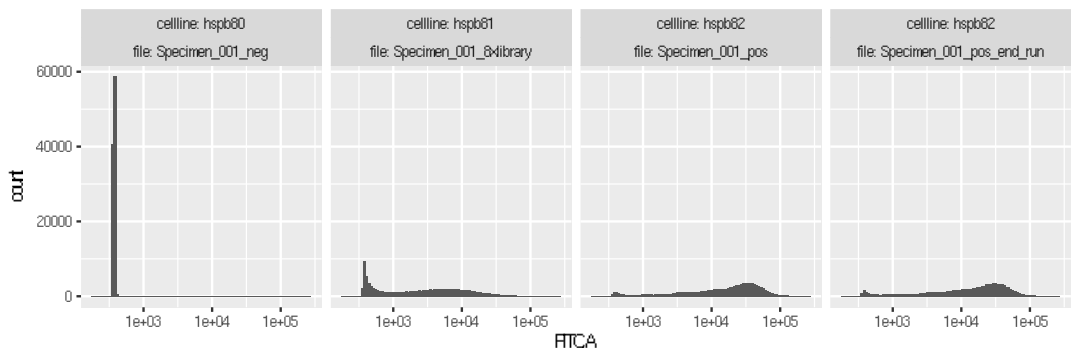

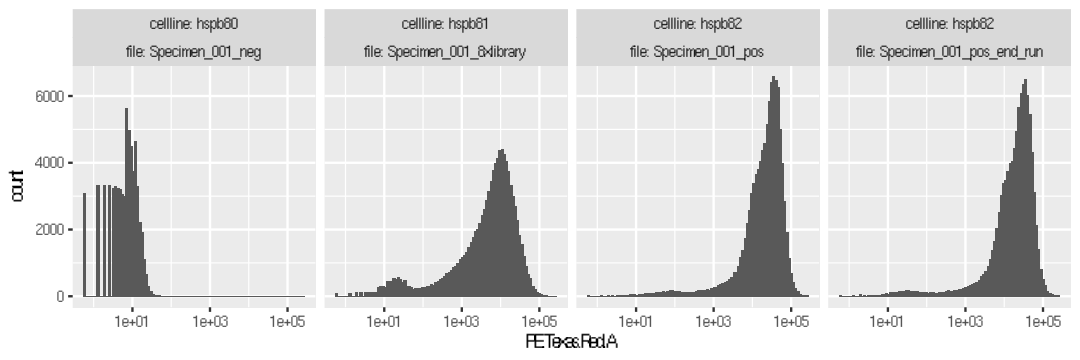

In [7]:
options(repr.plot.width=9, repr.plot.height=3)

# Plot eYFP fluoresence histograms
data %>% 
  ggplot(aes(x = FITC.A)) +
  facet_grid(~ cellline + file, scales = "free_y", labeller = "label_both") +
  geom_histogram(bins = 100) +
  scale_x_log10()

# Plot hsmKate2 fluorsecnce
data %>% 
  ggplot(aes(x = PE.Texas.Red.A)) +
  facet_grid(~ cellline + file, scales = "free_y", labeller = "label_both") +
  geom_histogram(bins = 100) +
  scale_x_log10()


### Plot eYFP+ mKate2+ cells

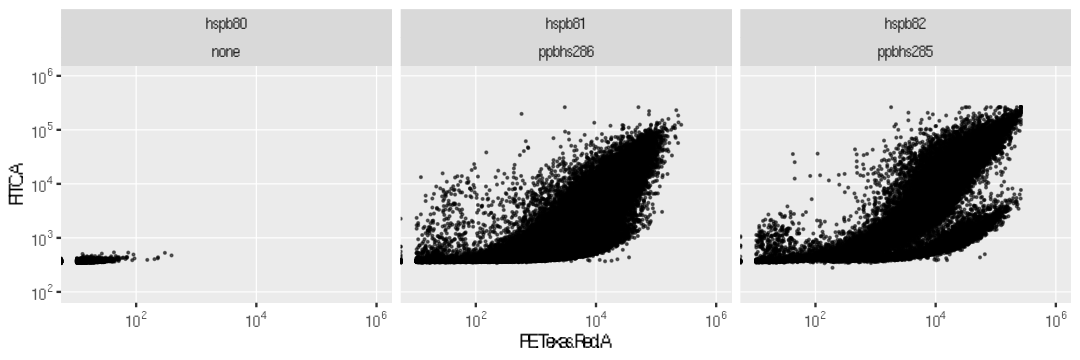

In [8]:
data %>% 
  ggplot(aes(PE.Texas.Red.A, FITC.A)) + 
  geom_point(aes(alpha = 0.01), size = 0.1) +
  scale_x_continuous(trans = "log10",
                     labels = scales::trans_format("log10", 
                                                   scales::math_format(10^.x)),
                                                   limits = c(10, 1000000)) +
  scale_y_continuous(trans = "log10",
                     labels = scales::trans_format("log10", 
                                                   scales::math_format(10^.x)),
                                                   limits = c(100, 1000000)) +
  theme(panel.grid.major = element_line(size = 0.25),
        panel.grid.minor = element_blank(),
        legend.position = "none") +
  facet_grid(~ cellline + plasmid)

### Highlight differenent YFP / mKate ratio populations

# A tibble: 400,000 × 17
   file      FSC.A  FSC.W FSC.H  SSC.A  SSC.W SSC.H    YFP    RFP  ratio Ratio…¹
   <chr>     <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl>  <dbl>  <dbl>   <dbl>
 1 Specime… 1.09e5 9.33e4 76656 4.68e4 8.57e4 35764 14110. 1.42e4 2.53e5 200988.
 2 Specime… 9.93e4 9.01e4 72201 5.92e4 9.46e4 41005   516. 4.54e2 8.68e4 262143 
 3 Specime… 1.14e5 9.95e4 75088 8.08e4 1.07e5 49716 22650. 3.20e4 1.82e5  93263.
 4 Specime… 1.11e5 9.64e4 75389 4.20e4 8.95e4 30781 11709. 1.23e4 2.42e5 236866.
 5 Specime… 1.64e5 1.45e5 74113 9.93e4 1.49e5 43745   934. 2.52e3 5.91e4 262143 
 6 Specime… 5.18e4 8.08e4 42064 5.42e4 8.85e4 40112   880. 1.79e3 7.53e4 262143 
 7 Specime… 1.11e5 9.01e4 81112 3.63e4 8.90e4 26696   369. 3.84e1 2.02e4 262143 
 8 Specime… 2.50e5 1.72e5 95208 1.07e5 1.90e5 36764  8683. 2.07e4 1.05e5 262143 
 9 Specime… 1.07e5 9.75e4 71771 4.56e4 9.51e4 31419  1819. 1.15e4 3.30e4 242889.
10 Specime… 1.22e5 8.48e4 94100 4.83e4 8.93e4 35408   379. 1.40e1 2.49e5 262143 
# …

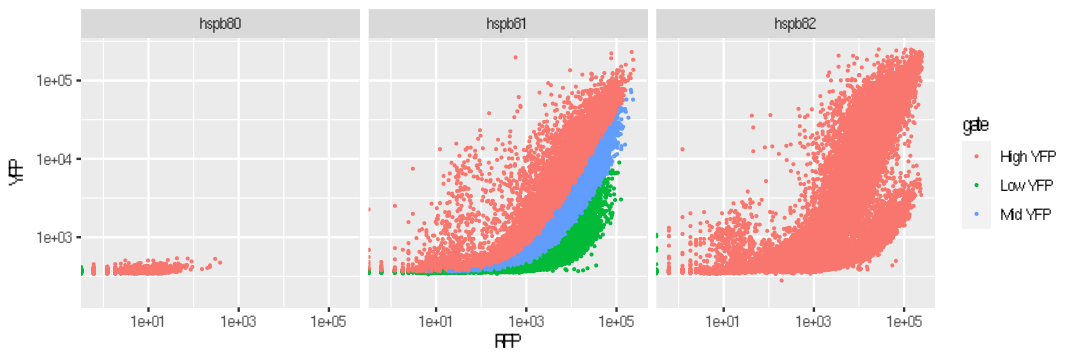

In [9]:

plot_data <- data %>% 
  rename(RFP = PE.Texas.Red.A) %>% 
  rename(YFP = FITC.A) %>% 
  rename(ratio = Ratio..FITC.A.PE.Texas.Red.A) %>%  
  mutate(gate = case_when(
         ratio <=  25000 ~ "Low YFP",
         ratio > 25000 & ratio < 100000 ~ "Mid YFP",
         ratio >= 100000 ~ "High YFP",
         TRUE ~ "NA")) %>% print()
 
plot_data %>% 
  ggplot(aes(x = RFP, y = YFP, color = gate)) + 
  geom_point(size = 0.1, alpha = 1) +
  facet_wrap(~ cellline) + 
  # geom_density_2d_filled() +
  scale_x_log10(limits = c(-10, 250000)) +
  scale_y_log10(limits = c(-10, 250000)) +
  NULL

### Further clean up plots to recapitulate FACS gating strategy 

- Remove untransfected control sample (not useful for plotting purposes)

- Remove fsc and ssc values not passing the sort cutoffs we set: 
  - FSC.H > 30,000 & < 140,000 
  - FSC.W > 80,000 & < 140,000
  - SSC.H > 20,000 & < 100,000
  - SSC.W > 80,000 & < 120,000
  - (data looks about the same after applying these cutoffs)


- Tried setting ratios manually. This is controlable, but not specifically accurate. We may be better off using the ratios generated by the FACS run. 

- Also, these data look a bit different from the FACS-seq gating images. I think that's because the FACS-seq gates have negative log plotted on them, whereas those points are cut off here. 

In [12]:
sort_data <- data %>%
  # Remove untransfected line
  filter(cellline != "hspb80") %>% 
  filter(FSC.H > 30000 & FSC.H < 140000) %>%  
  filter(FSC.W > 80000 & FSC.H < 140000) %>%  
  filter(SSC.H > 20000 & FSC.H < 100000) %>% 
  filter(SSC.W > 80000 & FSC.H < 120000) %>% 
  rename(RFP = PE.Texas.Red.A) %>% 
  rename(YFP = FITC.A) %>% 
  rename(sort_ratio = Ratio..FITC.A.PE.Texas.Red.A) %>% 
  # Recalcualte ratio for both no-insert and 8x library samples
  mutate(ratio = (RFP / YFP)) %>% 
  mutate(gate = case_when(ratio <=  2.5 ~ "High YFP",
                          ratio > 2.5 & ratio < 7.5 ~ "Mid YFP",
                          ratio >= 7.5 ~ "Low YFP",
                          TRUE ~ "NA")) %>% print()

# A tibble: 244,720 × 18
   file     FSC.A  FSC.W FSC.H  SSC.A  SSC.W SSC.H    YFP    RFP sort_…¹ Ratio…²
   <chr>    <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl>  <dbl>   <dbl>   <dbl>
 1 Specim… 1.09e5 9.33e4 76656 4.68e4 8.57e4 35764 14110. 1.42e4 253037. 200988.
 2 Specim… 9.93e4 9.01e4 72201 5.92e4 9.46e4 41005   516. 4.54e2  86769. 262143 
 3 Specim… 1.14e5 9.95e4 75088 8.08e4 1.07e5 49716 22650. 3.20e4 182369.  93263.
 4 Specim… 1.11e5 9.64e4 75389 4.20e4 8.95e4 30781 11709. 1.23e4 242405. 236866.
 5 Specim… 1.64e5 1.45e5 74113 9.93e4 1.49e5 43745   934. 2.52e3  59050. 262143 
 6 Specim… 5.18e4 8.08e4 42064 5.42e4 8.85e4 40112   880. 1.79e3  75278. 262143 
 7 Specim… 1.11e5 9.01e4 81112 3.63e4 8.90e4 26696   369. 3.84e1  20191. 262143 
 8 Specim… 2.50e5 1.72e5 95208 1.07e5 1.90e5 36764  8683. 2.07e4 105409. 262143 
 9 Specim… 1.07e5 9.75e4 71771 4.56e4 9.51e4 31419  1819. 1.15e4  33046. 242889.
10 Specim… 1.22e5 8.48e4 94100 4.83e4 8.93e4 35408   379. 1.40e1 248877. 262143 
# …

# Final plotting of the 8x library data alone, for Fig1 publication

- A ratio of 10:1 RFP:YFP seems to appropriately incorporate the points in our Off-Low ratio bin.

- I'll use the actual flow cytometer ratio metric to show the gate here, but we can also note that this gate corresponds to a ~10:1 RFP/YFP ratio. 

# A tibble: 244,720 × 19
   file     FSC.A  FSC.W FSC.H  SSC.A  SSC.W SSC.H    YFP    RFP sort_…¹ Ratio…²
   <chr>    <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl>  <dbl>   <dbl>   <dbl>
 1 Specim… 1.09e5 9.33e4 76656 4.68e4 8.57e4 35764 14110. 1.42e4 253037. 200988.
 2 Specim… 9.93e4 9.01e4 72201 5.92e4 9.46e4 41005   516. 4.54e2  86769. 262143 
 3 Specim… 1.14e5 9.95e4 75088 8.08e4 1.07e5 49716 22650. 3.20e4 182369.  93263.
 4 Specim… 1.11e5 9.64e4 75389 4.20e4 8.95e4 30781 11709. 1.23e4 242405. 236866.
 5 Specim… 1.64e5 1.45e5 74113 9.93e4 1.49e5 43745   934. 2.52e3  59050. 262143 
 6 Specim… 5.18e4 8.08e4 42064 5.42e4 8.85e4 40112   880. 1.79e3  75278. 262143 
 7 Specim… 1.11e5 9.01e4 81112 3.63e4 8.90e4 26696   369. 3.84e1  20191. 262143 
 8 Specim… 2.50e5 1.72e5 95208 1.07e5 1.90e5 36764  8683. 2.07e4 105409. 262143 
 9 Specim… 1.07e5 9.75e4 71771 4.56e4 9.51e4 31419  1819. 1.15e4  33046. 242889.
10 Specim… 1.22e5 8.48e4 94100 4.83e4 8.93e4 35408   379. 1.40e1 248877. 262143 
# …

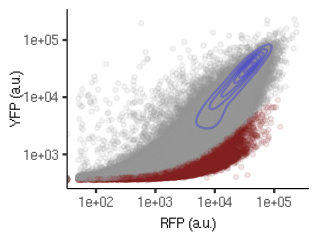

In [14]:
options(repr.plot.width=2.65, repr.plot.height=2)

stopPalette <- c("#999999", "#E69F00", "#E0115F", "#FF0000", "#000000")

plot_data <- sort_data %>% 
  mutate(gate = case_when(
         sort_ratio <=  25000 ~ "Low YFP",
         #sort_ratio > 25000 & sort_ratio < 100000 ~ "Mid YFP",
         sort_ratio > 25000 ~ "High YFP",
         TRUE ~ "NA")) %>% 
  # Let's make a set of gates based on YFP/RFP ratio 
  mutate(gate2 = case_when(ratio <  10 ~ "High YFP",
                          # ratio > 2.5 & ratio < 7.5 ~ "Mid YFP",
                           ratio >= 10 ~ "Low YFP",
                          TRUE ~ "NA")) %>% print()
    
plot_data %>% 
  filter(cellline != "hspb82") %>% 
  ggplot(aes(x = RFP, y = YFP, color = gate)) + 
  # Rasterize the geom_point layer so that the file isn't too large to work with!
  rasterise(geom_point(size = 1, alpha = 0.1), dpi = 300, scale = 1) +
  scale_color_manual(values = c("#999999","#832424","#832424")) +
  # facet_wrap(~ cellline) + 
  geom_density_2d(data = plot_data, aes(x = RFP, y = YFP), color = "blue", alpha = 0.25) +
  scale_x_log10(limits = c(50, 250000)) +
  scale_y_log10(limits = c(350, 250000)) +
  theme_classic()+
  labs(x = "RFP (a.u.)", y = "YFP (a.u.)") +
  theme(legend.position = "none",
        axis.title.x = element_text(margin = margin(t = 4), size = 8),
        axis.text.x = element_text(size=8),
        axis.title.y = element_text(margin = margin(t = 4), size = 8),
        axis.text.y = element_text(size=8),
        axis.line = element_line(colour = 'black', size = 0.25))+

  NULL

# ggsave("../figures/20220923_facs_gates.pdf")
